## Exploratory & Diagnostic Analysis (EDA)

### Motivation:

Every plot must answer a business question.
If a plot does not inform a decision, it does not belong in a professional analysis.

### 2.1 Playlist Performance Distribution
#### “How uneven is attention across videos?”
#### Motivation

##### Digital platforms typically show power-law behavior:

- A few videos generate most of the views

- Many videos generate little attention

##### Understanding this tells us:

- Whether the playlist relies on blockbusters

- Or has consistent performance


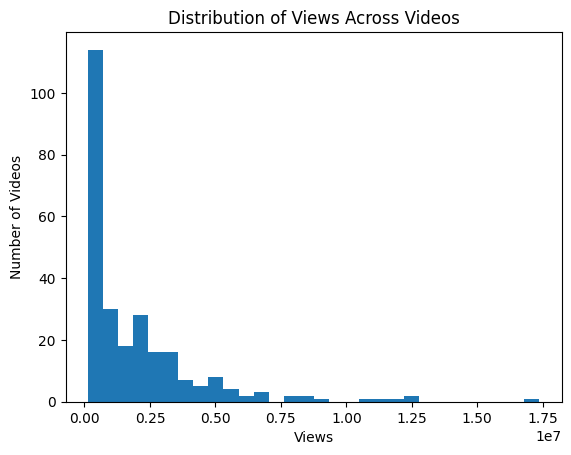

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../data/processed/video_features.csv")

plt.figure()
plt.hist(df["views"], bins=30)
plt.title("Distribution of Views Across Videos")
plt.xlabel("Views")
plt.ylabel("Number of Videos")
plt.show()


##### Business Insight

- Right-skewed distribution → hit-driven strategy

- Narrow distribution → predictable content performance

### 2.2 Engagement Efficiency
#### “Are views translating into interaction?”
#### Motivation

##### Raw views do not equal business value.

##### Engagement signals:

- Algorithm favorability

- Brand loyalty

- Conversion potential

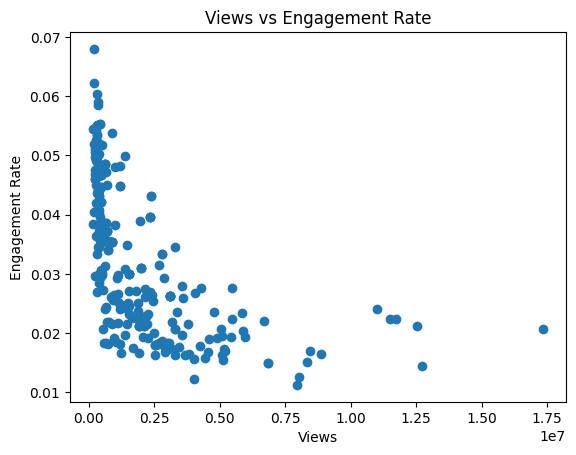

In [9]:
plt.figure()
plt.scatter(df["views"], df["engagement_rate"])
plt.xlabel("Views")
plt.ylabel("Engagement Rate")
plt.title("Views vs Engagement Rate")
plt.show()


##### Business Insight

- High views + low engagement → passive consumption

- Moderate views + high engagement → community value

This helps identify quality over quantity videos.

### 2.3 Time Efficiency of Content
#### “Is the 1-minute format actually efficient?”
#### Motivation

##### Nas Daily’s core value proposition is maximum value in minimum time.

##### We test:

- Do shorter videos generate disproportionately high attention?

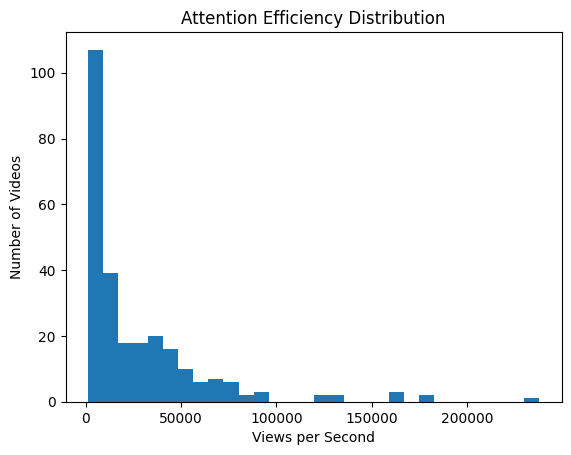

In [10]:
plt.figure()
plt.hist(df["views_per_second"], bins=30)
plt.xlabel("Views per Second")
plt.ylabel("Number of Videos")
plt.title("Attention Efficiency Distribution")
plt.show()


##### Business Insight

- High views/sec → strong format-product fit

- Wide variance → topic matters more than format

### 2.4 Comment Intensity Analysis
#### “Which videos generate conversation, not just clicks?”
#### Motivation

##### Comments indicate:

- Emotional response

- Controversy

- Community-building

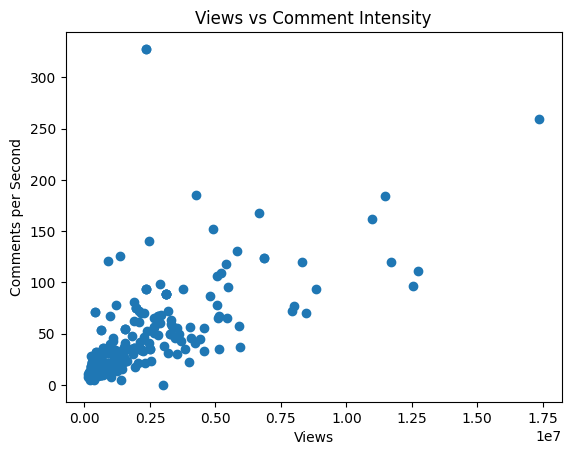

In [11]:
plt.figure()
plt.scatter(df["views"], df["comments_per_second"])
plt.xlabel("Views")
plt.ylabel("Comments per Second")
plt.title("Views vs Comment Intensity")
plt.show()


##### Business Insight

- Some videos invite discussion independent of views

- These are high brand affinity assets

### 2.5 Audience Concentration (Comments)
#### “Is engagement broad or driven by a few users?”
#### Motivation

##### Healthy communities:

- Many people comment occasionally Unhealthy communities:

- Few people dominate conversations

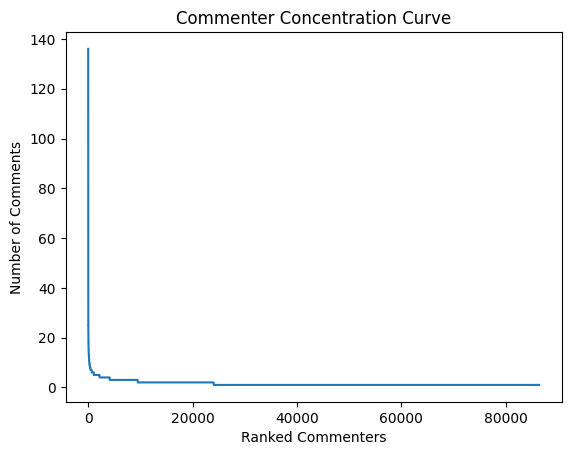

In [12]:
df_comments = pd.read_csv("../data/processed/top_commenters.csv")

plt.figure()
plt.plot(df_comments["comment_count"].values)
plt.xlabel("Ranked Commenters")
plt.ylabel("Number of Comments")
plt.title("Commenter Concentration Curve")
plt.show()


##### Business Insight

- Steep curve → small group dominates

- Flat curve → diverse audience participation

### 2.6 Language Density vs Engagement
#### “Does faster speech reduce or increase engagement?”
#### Motivation

##### Short videos require:

- High information density

- But not cognitive overload

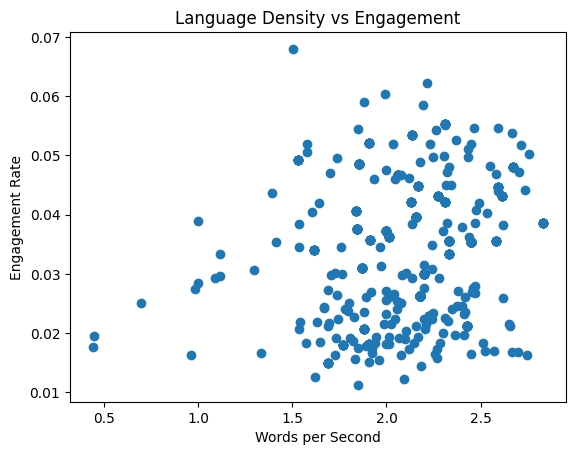

In [13]:
df_t = pd.read_csv("../data/processed/transcript_features.csv")

merged = df.merge(df_t, on="video_id")

plt.figure()
plt.scatter(merged["words_per_second"], merged["engagement_rate"])
plt.xlabel("Words per Second")
plt.ylabel("Engagement Rate")
plt.title("Language Density vs Engagement")
plt.show()


##### Business Insight

- Bell-shaped curve → optimal pacing exists

- Negative trend → overloading viewers

### 2.7 Content Volume vs Interaction
#### “Does more content lead to more interaction?”
#### Motivation

    More words ≠ better communication.

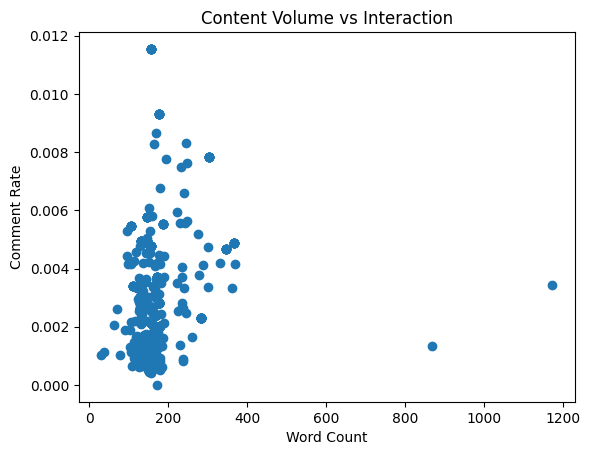

In [14]:
plt.figure()
plt.scatter(merged["word_count"], merged["comment_rate"])
plt.xlabel("Word Count")
plt.ylabel("Comment Rate")
plt.title("Content Volume vs Interaction")
plt.show()


##### Business Insight

- Higher word count with lower interaction → diluted messaging

- Optimal range → efficient storytelling